<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [1]:
student_number = '401100325'
Name = 'yashar'
Last_Name = 'paymai'

# Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import sklearn as sk

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [12]:
np.random.seed(42)


def generate_dataset(range_start, range_end, num_samples=100, noise_std=10.0, poly_degrees=None):
    if poly_degrees is None:
        poly_degrees = [0.2, -0.5, 2, -5, 3, -10, 5]
    X = np.random.uniform(range_start, range_end, num_samples)
    y = np.polyval(poly_degrees, X) + np.random.normal(0, noise_std, num_samples)
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

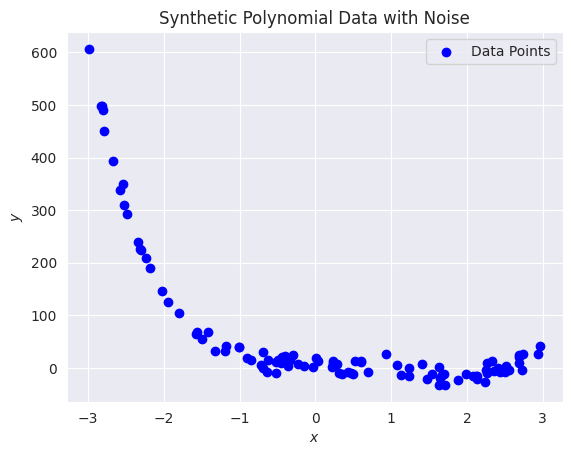

In [13]:
X, y = generate_dataset(-3, 3)

# Visualize the dataset using scatter
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Synthetic Polynomial Data with Noise")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [14]:
# Split dataset into the training and the in-range testing sets
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)
# Generate the out-of-range testing set
X_test_out_range, y_test_out_range = generate_dataset(5, 7, num_samples=len(X_test_in_range))

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

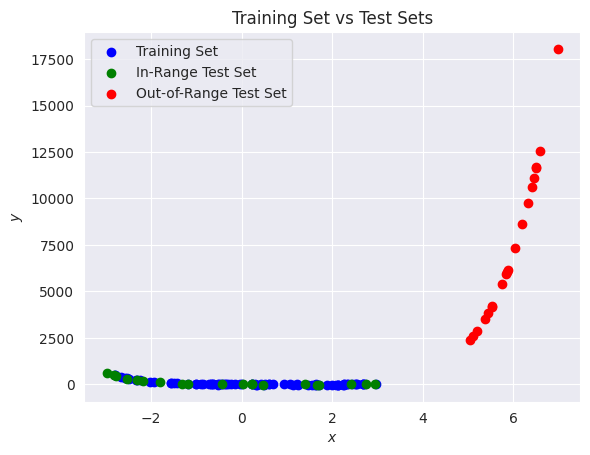

In [15]:
# Visualize the sets using scatter (or other plots)
plt.scatter(X_train, y_train, color='blue', label='Training Set')
plt.scatter(X_test_in_range, y_test_in_range, color='green', label='In-Range Test Set')
plt.scatter(X_test_out_range, y_test_out_range, color='red', label='Out-of-Range Test Set')
plt.title("Training Set vs Test Sets")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [16]:
def train_models(X, y, degree):
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(),
    )
    model.fit(X.reshape(-1, 1), y)
    return model

In [17]:
models = {}
degree = 9

# Add the trained models with different degrees to the dict
for i in range(2, degree + 1):
    models[i] = train_models(X_train, y_train, i)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [18]:
def evaluate_models(models, X_test, y_test):
    losses = np.array([])
    # Calculate MSE of each model (on the input test set).
    for i in models.keys():
        y_pred = models[i].predict(X_test.reshape(-1, 1))
        loss = mean_squared_error(y_test, y_pred)
        losses = np.append(losses, loss)
    return losses

In [19]:
# Evaluate models on both the train and the test sets.
losses_in_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_range = evaluate_models(models, X_test_out_range, y_test_out_range)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

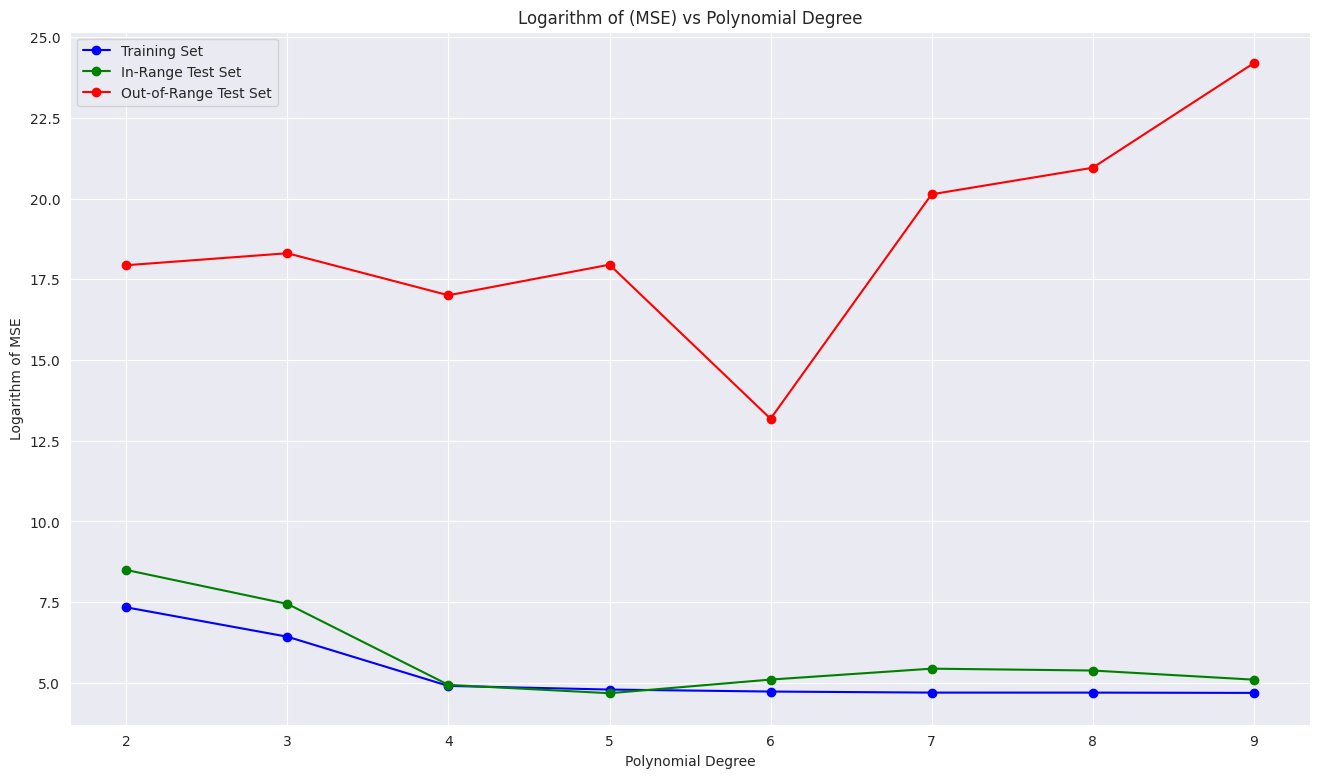

In [20]:
# Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
log_losses_in_train = np.log(losses_in_train)
log_losses_in_range = np.log(losses_in_range)
log_losses_out_range = np.log(losses_out_range)

# Plot the log MSE results
plt.figure(figsize=(16, 9))
plt.plot(range(2, degree + 1), log_losses_in_train, color='blue', label='Training Set', marker='o')
plt.plot(range(2, degree + 1), log_losses_in_range, color='green', label='In-Range Test Set', marker='o')
plt.plot(range(2, degree + 1), log_losses_out_range, color='red', label='Out-of-Range Test Set', marker='o')
plt.title("Logarithm of (MSE) vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Logarithm of MSE")
plt.legend()
plt.show()



In [21]:
# Print each model loss on the training and the two test sets
for i in range(2, degree + 1):
    print(
        f"Degree: {i} | Train Loss: {log_losses_in_train[i - 2]:.2f} | In-Range Test Loss: {log_losses_in_train[i - 2]:.2f} | Out-of-Range Test Loss: {log_losses_out_range[i - 2]:.2f}")

Degree: 2 | Train Loss: 7.34 | In-Range Test Loss: 7.34 | Out-of-Range Test Loss: 17.94
Degree: 3 | Train Loss: 6.43 | In-Range Test Loss: 6.43 | Out-of-Range Test Loss: 18.31
Degree: 4 | Train Loss: 4.91 | In-Range Test Loss: 4.91 | Out-of-Range Test Loss: 17.01
Degree: 5 | Train Loss: 4.79 | In-Range Test Loss: 4.79 | Out-of-Range Test Loss: 17.96
Degree: 6 | Train Loss: 4.73 | In-Range Test Loss: 4.73 | Out-of-Range Test Loss: 13.18
Degree: 7 | Train Loss: 4.70 | In-Range Test Loss: 4.70 | Out-of-Range Test Loss: 20.13
Degree: 8 | Train Loss: 4.70 | In-Range Test Loss: 4.70 | Out-of-Range Test Loss: 20.96
Degree: 9 | Train Loss: 4.69 | In-Range Test Loss: 4.69 | Out-of-Range Test Loss: 24.20


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:white;">**Answer:** 
As we can see, initially, the bias is high (training set loss is high). As we increase the degree, the bias decreases while the variance increases. Although there is no line in the plot to represent variance, the in-range test set loss and out-of-range test set loss are highly correlated with variance and bias squared ("E[(y − hw (x))**2 ] = Bias** 2+ Variance + Noise ). Therefore, there is a trade-off between variance and bias, which results in the minimum loss at degree 6. </span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:white;">**Answer:**
As the complexity of the model increases, the variance of the model increases and the bias decreases. Here, the hyperparameter that changes the complexity of the model is the degree. Increasing the degree makes the model more complex. Therefore, increasing the degree decreases the bias and increases the variance. We know that more variance means more overfitting, and less bias means underfitting. As I explained in question 1, there is a trade-off between bias and variance, which makes some point in the middle the optimal degree. </span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [22]:
file_path = "./InsuranceData.csv"
# Load the Dataset
data = pd.read_csv(file_path)
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [23]:
# you can use .info() and .description()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

In [56]:
from scipy import stats

# apply any pre processing method you think is necessary

#Encoding
cleaned_data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], dtype='float64')
cleaned_data['age'] = np.float64(cleaned_data['age'])
cleaned_data['children'] = np.float64(cleaned_data['children'])

#outlier Detection
cleaned_data = cleaned_data[(np.abs(stats.zscore(cleaned_data)) < 4).all(axis=1)]

#Normalization continues variables using / min()

# cleaned_data[['age', 'bmi' , 'charges']] = cleaned_data[['age', 'bmi', 'charges']] / cleaned_data[['age', 'bmi', 'charges']].min() * 25


cleaned_data.info()
cleaned_data.describe()


# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.

<class 'pandas.core.frame.DataFrame'>
Index: 1336 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1336 non-null   float64
 1   bmi               1336 non-null   float64
 2   children          1336 non-null   float64
 3   charges           1336 non-null   float64
 4   sex_female        1336 non-null   float64
 5   sex_male          1336 non-null   float64
 6   smoker_no         1336 non-null   float64
 7   smoker_yes        1336 non-null   float64
 8   region_northeast  1336 non-null   float64
 9   region_northwest  1336 non-null   float64
 10  region_southeast  1336 non-null   float64
 11  region_southwest  1336 non-null   float64
dtypes: float64(12)
memory usage: 135.7 KB


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.00000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.191617,30.651089,1.096557,13195.704858,0.49476,0.50524,0.796407,0.203593,0.242515,0.243263,0.270958,0.243263
std,14.053748,6.085499,1.205650,11963.859697,0.50016,0.50016,0.402820,0.402820,0.428765,0.429214,0.444621,0.429214
min,18.000000,15.960000,0.000000,1121.873900,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.750000,26.272500,0.000000,4733.635288,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9369.615750,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.681250,2.000000,16579.959053,1.00000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,60021.398970,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Split the dataset into two parts such that the training set contains 80% of the samples.
data_train, data_test = train_test_split(cleaned_data, test_size=0.2, random_state=42)
dataX_train, dataY_train = data_train.drop('charges', axis=1), data_train['charges']
dataX_test, dataY_test = data_test.drop('charges', axis=1), data_test['charges']

# Training

Fit a linear regressor to the data.

In [58]:
# Use sklearn
model = LinearRegression()
model.fit(dataX_train, dataY_train)


LinearRegression()

Get the coefficients of the variables and visualize it

<Figure size 640x480 with 0 Axes>

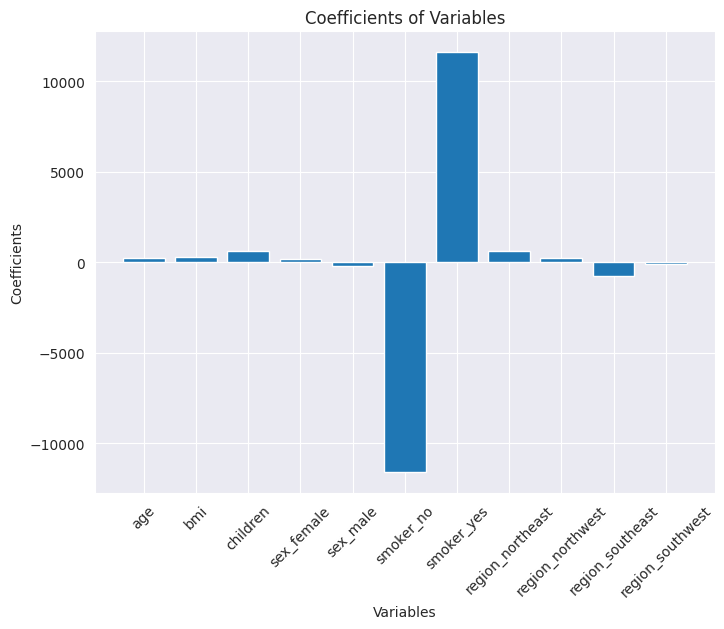

Coefficients: [   254.10102858    316.33835762    622.05662156    211.23061378
   -211.23061378 -11610.6064287   11610.6064287     603.06422288
    268.04745569   -763.25733106   -107.85434751]


In [59]:


coefficients = model.coef_

def plot_Coefficient_variables(coefficients , dataX_train , title):
    plt.figure()
    plt.figure(figsize=(8, 6))
    plt.bar(dataX_train.columns, coefficients)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel("Variables")
    plt.ylabel("Coefficients")
    plt.show()

plot_Coefficient_variables(coefficients , dataX_train , title="Coefficients of Variables")


print("Coefficients:", coefficients)


# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

Coefficients: [ 2.54115210e+02  3.16112444e+02  6.21492183e+02  4.17674894e+02
 -4.60089211e-13 -2.32136978e+04  2.36822353e-10  7.02280496e+02
  3.67403342e+02 -6.54914934e+02 -0.00000000e+00]


<Figure size 640x480 with 0 Axes>

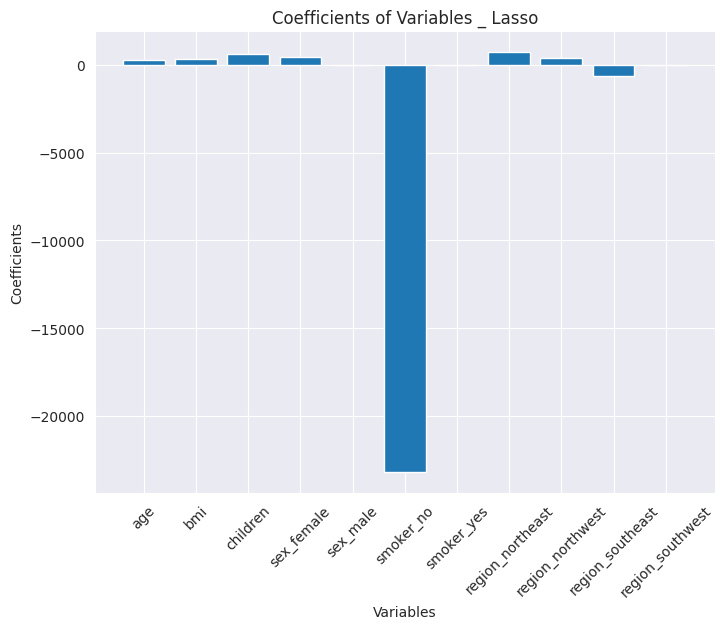

In [60]:
# Use Lasso from sklearn library
lasso_model = Lasso()
lasso_model.fit(dataX_train, dataY_train)

coefficients = lasso_model.coef_


print("Coefficients:", coefficients)

plot_Coefficient_variables(coefficients , dataX_train , title="Coefficients of Variables _ Lasso")

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

Coefficients: [   254.09011599    316.10061313    622.14949031    208.03166212
   -208.03166212 -11575.16208915  11575.16208915    600.0627898
    264.69600917   -756.80012317   -107.9586758 ]


<Figure size 640x480 with 0 Axes>

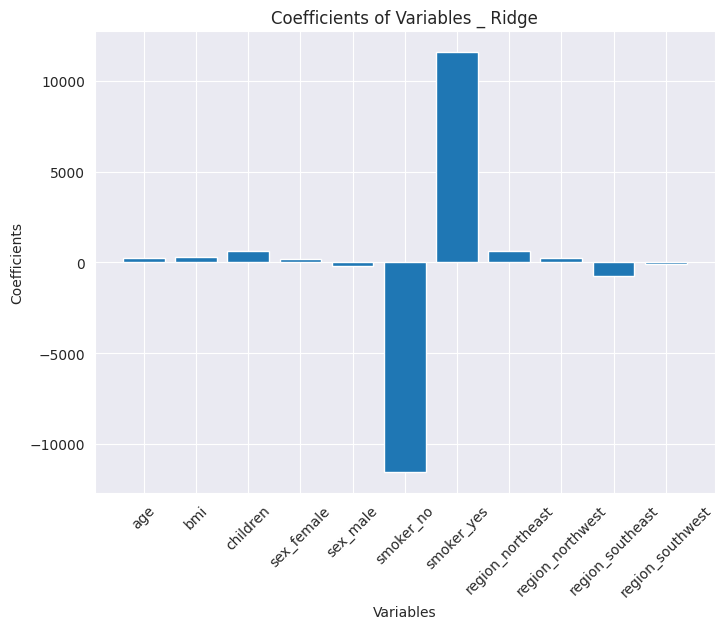

In [61]:
#  Use Ridge from sklearn library
ridge_model = Ridge()
ridge_model.fit(dataX_train, dataY_train)

coefficients = ridge_model.coef_

print("Coefficients:", coefficients)

plot_Coefficient_variables(coefficients , dataX_train , title="Coefficients of Variables _ Ridge")


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

Linear Regression MAPE: 0.41861287500770733


<Figure size 640x480 with 0 Axes>

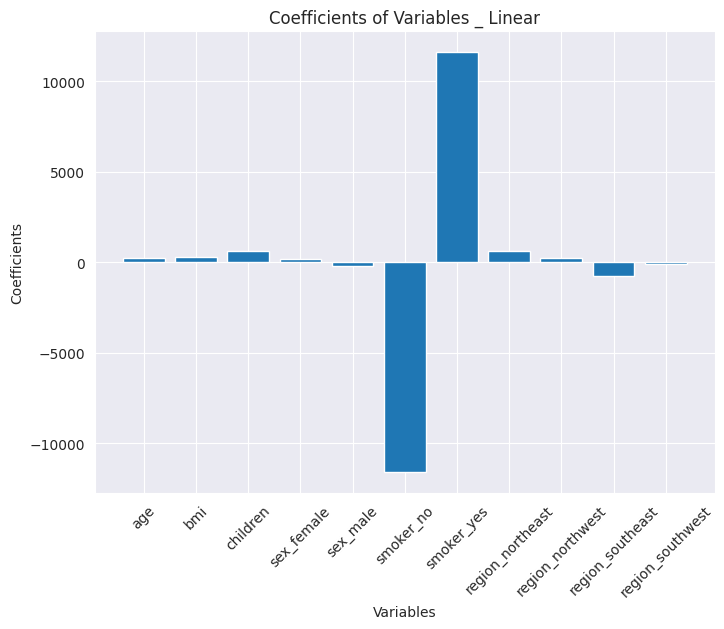

Best Alpha for Lasso: 1e-05 MAPE: 0.41861287570568456


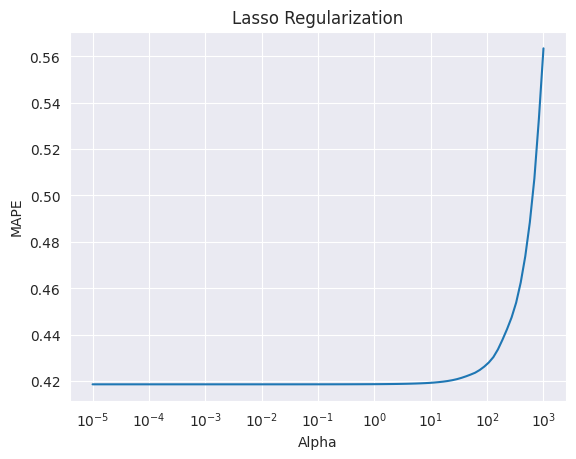

<Figure size 640x480 with 0 Axes>

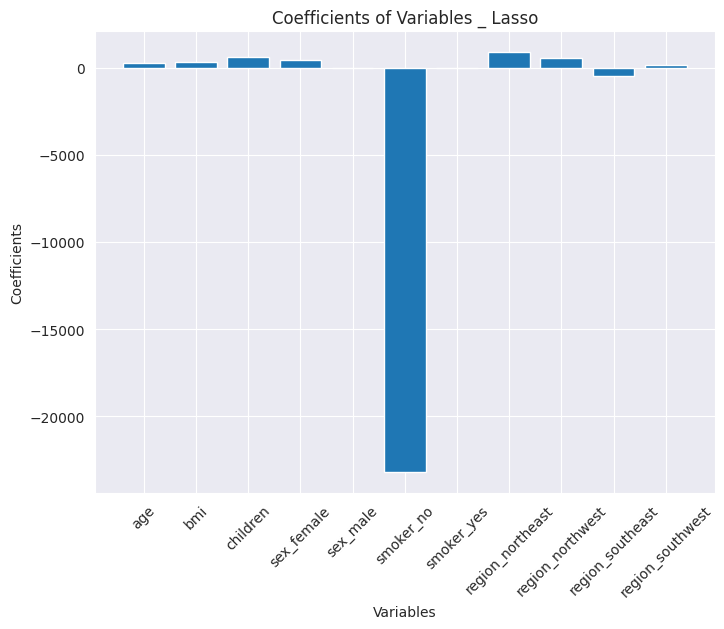

Best Alpha for Ridge: 1e-05 MAPE: 0.41861288570468175


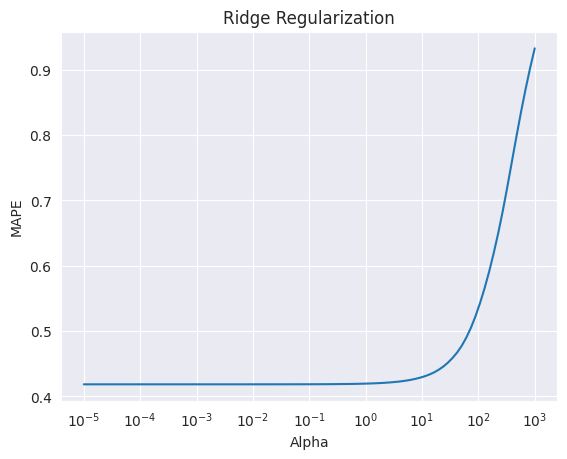

<Figure size 640x480 with 0 Axes>

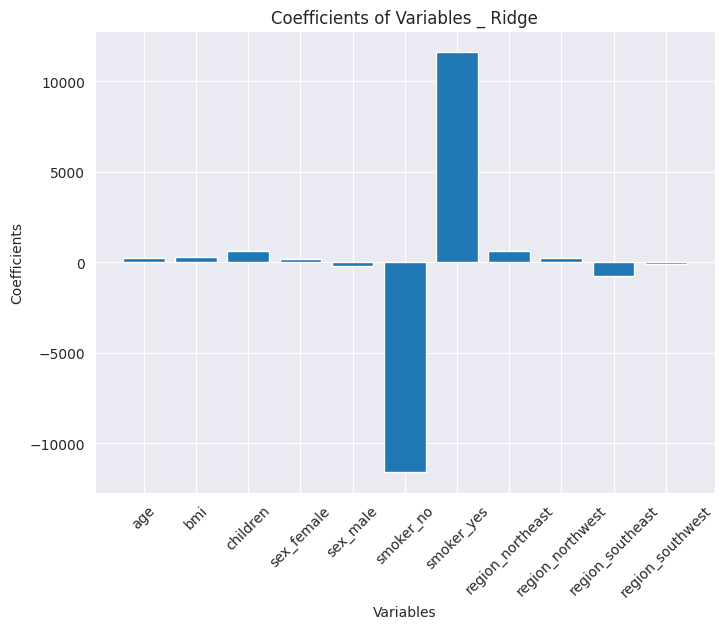

In [62]:
#Use folding methods and mape from sklearn library
import warnings

warnings.filterwarnings("ignore")
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    loss = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)
    return loss

#normal Linear
linear_model = LinearRegression()
kFold = KFold(n_splits=5, shuffle=True, random_state=42)
mape_list= cross_val_score(linear_model, dataX_train, dataY_train, cv=kFold, scoring=evaluate_model)
print("Linear Regression MAPE:", np.mean(mape_list))

linear_model.fit(dataX_train, dataY_train)
plot_Coefficient_variables(linear_model.coef_ , dataX_train , title="Coefficients of Variables _ Linear")
    

# Lasso
alphas = np.logspace(-5,3 , 100)
lasso_mape = []
best_alpha = 0
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    kFold = KFold(n_splits=5, shuffle=True, random_state=42)
    mape_list= cross_val_score(lasso_model, dataX_train, dataY_train, cv=kFold, scoring=evaluate_model)
    lasso_mape.append(np.mean(mape_list))
    if lasso_mape[-1] == min(lasso_mape):
        best_alpha = alpha
print("Best Alpha for Lasso:", best_alpha , "MAPE:", min(lasso_mape))
plt.plot(alphas, lasso_mape)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAPE')
plt.title('Lasso Regularization')
plt.show()

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(dataX_train, dataY_train)
plot_Coefficient_variables(lasso_model.coef_ , dataX_train , title="Coefficients of Variables _ Lasso")

# Ridge
ridge_mape = []
best_alpha = 0
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    kFold = KFold(n_splits=5, shuffle=True, random_state=42)
    mape_list= cross_val_score(ridge_model, dataX_train, dataY_train, cv=kFold, scoring=evaluate_model)
    ridge_mape.append(np.mean(mape_list))
    if ridge_mape[-1] == min(ridge_mape):
        best_alpha = alpha
print("Best Alpha for Ridge:", best_alpha , "MAPE:", min(ridge_mape))
plt.plot(alphas, ridge_mape)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAPE')
plt.title('Ridge Regularization')
plt.show()

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(dataX_train, dataY_train)
plot_Coefficient_variables(ridge_model.coef_ , dataX_train , title="Coefficients of Variables _ Ridge")


Add extra variables to dataset to make model more complex, then compare the results. 

Degree: 1 | MAPE: 0.4186128750077091
Degree: 2 | MAPE: 0.36512886395016747
Degree: 3 | MAPE: 0.49639830350506575
Degree: 4 | MAPE: 0.43104184058429446
Degree: 5 | MAPE: 1.0521955787502122
Degree: 1 | Best Alpha for Lasso: 0.001 | MAPE: 0.41861294480513206


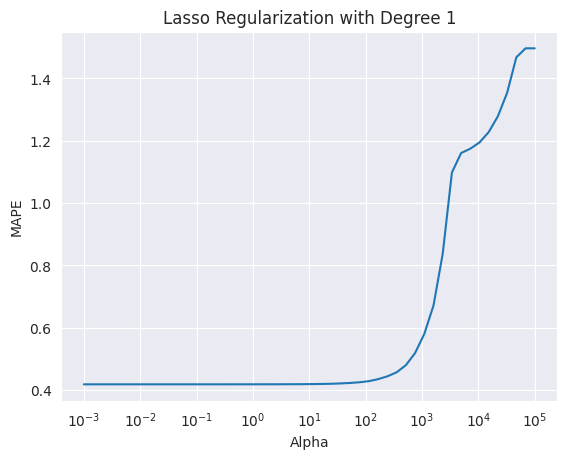

Degree: 2 | Best Alpha for Lasso: 355.64803062231283 | MAPE: 0.25277787531761603


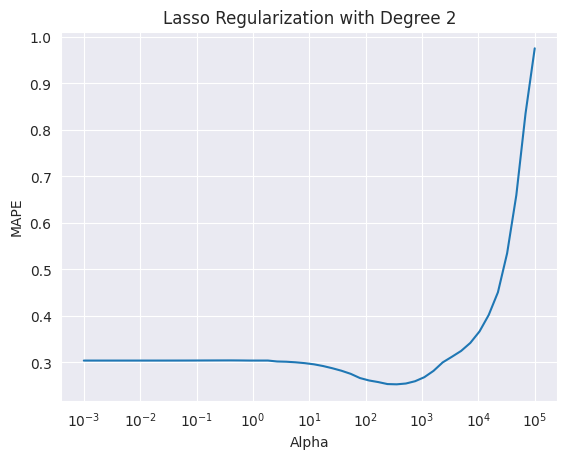

Degree: 3 | Best Alpha for Lasso: 115.13953993264457 | MAPE: 0.31133916063863726


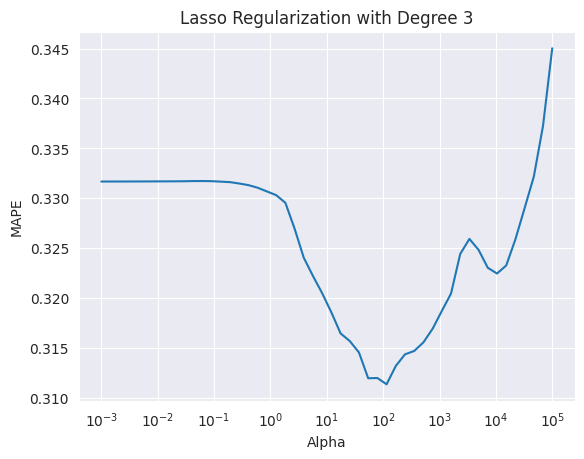

Degree: 4 | Best Alpha for Lasso: 3393.221771895323 | MAPE: 0.30764706804826214


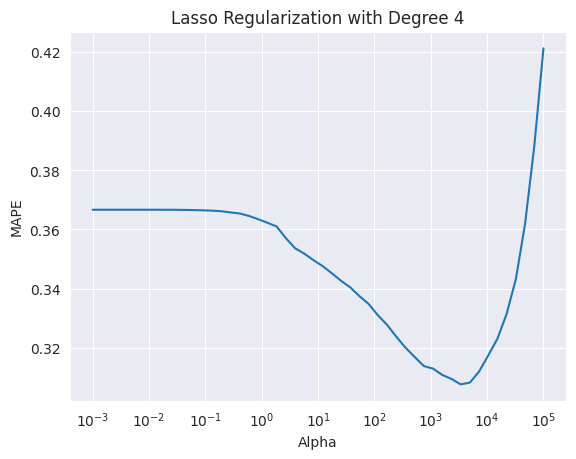

Degree: 1 | Best Alpha for Ridge: 0.001 | MAPE: 0.41861394470088964


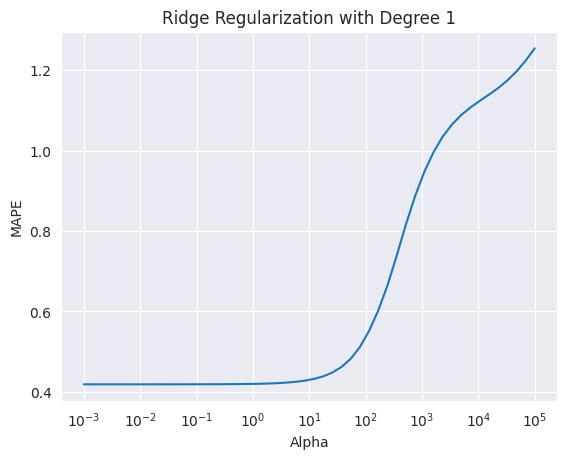

Degree: 2 | Best Alpha for Ridge: 754.3120063354608 | MAPE: 0.25797072325491055


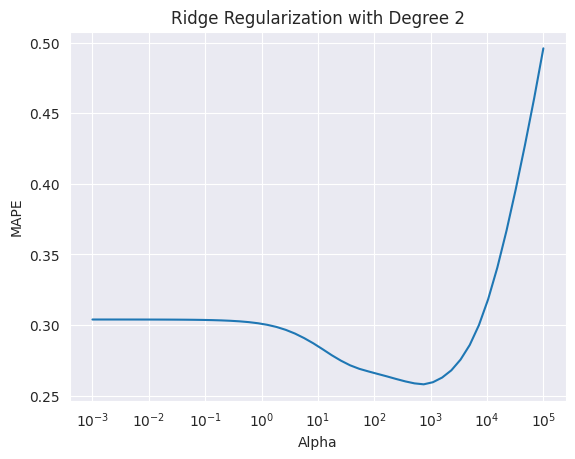

Degree: 3 | Best Alpha for Ridge: 2329.951810515367 | MAPE: 0.3163776500711618


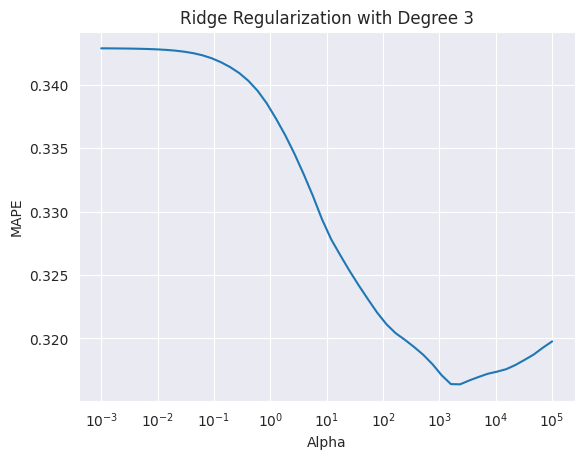

In [63]:
# Increase No. of dimensions using PolynomialFeatures from sklearn 



degrees = [1 , 2 , 3 , 4 , 5]

#normal Linear
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    kFold = KFold(n_splits=5, shuffle=True, random_state=42)
    mape_list= cross_val_score(model, dataX_train, dataY_train, cv=kFold, scoring=evaluate_model)
    print(f"Degree: {degree} | MAPE: {np.mean(mape_list)}")


degrees = [1 , 2 , 3 , 4]
alphas = np.logspace(-3 , 5 , 50)

# Lasso
import warnings

warnings.filterwarnings("ignore")

for degree in degrees:
    lasso_mape = []
    best_alpha = 0
    for alpha in alphas:
        lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
        kFold = KFold(n_splits=5, shuffle=True, random_state=42)
        mape_list= cross_val_score(lasso_model, dataX_train, dataY_train, cv=kFold, scoring=evaluate_model)
        lasso_mape.append(np.mean(mape_list))
        if lasso_mape[-1] == min(lasso_mape):
            best_alpha = alpha
    print(f"Degree: {degree} | Best Alpha for Lasso: {best_alpha} | MAPE: {min(lasso_mape)}")
    plt.plot(alphas, lasso_mape)
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('MAPE')
    plt.title('Lasso Regularization with Degree ' + str(degree))
    plt.show()


#Ridge
alphas = np.logspace(-3, 5, 50)
degrees = [1 ,2 , 3]
for degree in degrees:
    ridge_mape = []
    best_alpha = 0
    for alpha in alphas:
        ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
        kFold = KFold(n_splits=5, shuffle=True, random_state=42)
        mape_list= cross_val_score(ridge_model, dataX_train, dataY_train, cv=kFold, scoring=evaluate_model)
        ridge_mape.append(np.mean(mape_list))
        if ridge_mape[-1] == min(ridge_mape):
            best_alpha = alpha
    print(f"Degree: {degree} | Best Alpha for Ridge: {best_alpha} | MAPE: {min(ridge_mape)}")
    plt.plot(alphas, ridge_mape)
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('MAPE')
    plt.title('Ridge Regularization with Degree ' + str(degree))
    plt.show()







Report your best model with its evaluated results.

In [64]:
#Print each model's loss on the training and the test set.
best_normal_model = make_pipeline(PolynomialFeatures(1), LinearRegression())
best_normal_model.fit(dataX_train, dataY_train)
print("Normal Linear Regression MAPE:", evaluate_model(best_normal_model, dataX_test, dataY_test))

best_Lasso_model = make_pipeline(PolynomialFeatures(2), Lasso(alpha=355))
best_Lasso_model.fit(dataX_train, dataY_train)
print("Best Lasso Regression MAPE:", evaluate_model(best_Lasso_model, dataX_test, dataY_test))

best_Reg_model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=760))
best_Reg_model.fit(dataX_train, dataY_train)
print("Best Ridge Regression MAPE:", evaluate_model(best_Reg_model, dataX_test, dataY_test))




Normal Linear Regression MAPE: 0.3645544524630261
Best Lasso Regression MAPE: 0.23657975620997054
Best Ridge Regression MAPE: 0.24598542441508664


In [65]:
#makin submission.csv


data_test = pd.read_csv('InsuranceData_test.csv')
data_test = pd.get_dummies(data_test,columns=['sex', 'smoker', 'region'], dtype='float64')
data_test['age'] = np.float64(data_test['age'])
data_test['children'] = np.float64(data_test['children'])

prediction = best_Lasso_model.predict(data_test)
submission = pd.DataFrame()
submission['charges'] = prediction
submission.to_csv('submission.csv', index=False)


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:white;">**Answer:** 
- ridge : 
    The L2 penalty in ridge regression discourages large coefficient values, pushing them towards zero but never exactly reaching zero. This shrinks the less important features’ impact.Ridge regression does not yield sparse models since all coefficients remain non-zero.
- lasso : 
    The L1 penalty in lasso regression can drive some coefficients to exactly zero when the lambda value is large enough, performing feature selection and resulting in a sparse model.Lasso regression can produce sparse models by setting some coefficients to exactly zero.</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:white;">**Answer:** 
    Regularization penalizes large coefficients. As alpha increases, the penalty for large coefficients becomes stronger, leading to smaller absolute values for the coefficients.In Ridge, increasing alpha shrinks the coefficients towards zero but does not set them exactly to zero. This means all features are retained but with reduced influence. In Lasso, increasing alpha can lead to some coefficients becoming exactly zero, effectively removing those features from the model. This can be useful for feature selection, especially in high-dimensional datasets.
    By shrinking or eliminating coefficients, regularization can lead to simpler models that are easier to interpret. A model with fewer non-zero coefficients is generally more interpretable because it relies on fewer features.
  </span>

3. How does the regularization affect dimension expansion?

- <span style="color:white;">**Answer:** 
    When expanding the dimensions of data like by adding polynomial features, the model can become very complex and prone to overfitting. Regularization techniques like Lasso and Ridge add a penalty to the loss function, discouraging the model from fitting the noise in the data.
and for example about lasso ,  lasso regularization can lead to sparse solutions, where some of the coefficients are exactly zero. This can be beneficial in high-dimensional settings as it effectively performs feature selection, reducing the number of dimensions the model needs to consider.